In [35]:
from pathlib import Path
from co2data.eval.evaluation import load_data, load_multiple_files
import pandas as pd

datafile_dir = Path("/home/camma/Documents/privat/alpenverein/results")
datafiles = datafile_dir.glob("batch*.json")
df = load_multiple_files(datafiles)
df = df.drop(["emission_by_unit", "emission_by_price"], axis=1)
display(df)

,bill_file,category_name,category_area,category_unit,department,value,amount,price,bill_status
0,20230116092754316.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Geschäftsstelle,2349.34,1.0,0.0,BillStatus.DONE
1,20230124093831108.pdf,Papier - Frischfaser,Büro,kg,Geschäftsstelle,16.02,1.0,0.0,BillStatus.DONE
2,20230124093523978.pdf,Weiterbildung/Training,Dienstleistungen,EUR,Geschäftsstelle,30.00,1.0,0.0,BillStatus.DONE
3,20230124094314394.pdf,Catering & Restaurants,Dienstleistungen,EUR,Geschäftsstelle,28.49,1.0,0.0,BillStatus.DONE
4,20230124094314394.pdf,Catering & Restaurants,Dienstleistungen,EUR,Geschäftsstelle,81.21,1.0,0.0,BillStatus.DONE
...,...,...,...,...,...,...,...,...,...
36,Rechnung_4191_18-01-2023_13-25.pdf,IT-Dienstleistungen,Dienstleistungen,EUR,Kletter- und Boulderzentrum,378.54,1.0,0.0,BillStatus.DONE
37,Rechnung_4318782.pdf,Softdrinks,Küche und Sanitärbereich,Liter,Kletter- und Boulderzentrum,0.30,20.0,0.0,BillStatus.DONE
38,RechNetz_0431336_1127687870_20220831_(3).pdf,Finanzdienstleistungen,Dienstleistungen,EUR,Geschäftsstelle,156.77,1.0,0.0,BillStatus.DONE
39,Rechnung_2022-12-13_100115058061_V78063047.pdf,IT-Dienstleistungen,Dienstleistungen,EUR,Geschäftsstelle,8.40,1.0,0.0,BillStatus.DONE


In [36]:
from co2data.categories.importer import create_category_provider_from_directory

category_dir = Path("../data/categories")
category_provider = create_category_provider_from_directory(category_dir)
categories = pd.DataFrame(category_provider.get_all()).rename(columns={"name": "category_name"})
emissions = categories[["category_name", "emission_by_unit", "emission_by_price"]]
display(emissions)

,category_name,emission_by_unit,emission_by_price
0,Wasser,"0,22","0,46"
1,Säfte & Schorlen,"2,58","0,46"
2,Softdrinks,"0,55","0,46"
3,Alkoholische Getränke,"1,2","0,46"
4,Kaffee,"3,18","0,45"
...,...,...,...
68,Sicherheitsdienstleistungen,"0,169",None
69,Versicherungen,"0,11",None
70,Weiterbildung/Training,"0,063",None
71,Werbung,"0,169",None


In [37]:
emissions["emission_by_unit"] = emissions["emission_by_unit"].replace(",", ".", regex=True).astype(float)
emissions["emission_by_price"] = emissions["emission_by_price"].replace(",", ".", regex=True).astype(float)
display(emissions)

/tmp/ipykernel_1398545/3290622609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions["emission_by_unit"] = emissions["emission_by_unit"].replace(",", ".", regex=True).astype(float)
/tmp/ipykernel_1398545/3290622609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions["emission_by_price"] = emissions["emission_by_price"].replace(",", ".", regex=True).astype(float)


,category_name,emission_by_unit,emission_by_price
0,Wasser,0.220,0.46
1,Säfte & Schorlen,2.580,0.46
2,Softdrinks,0.550,0.46
3,Alkoholische Getränke,1.200,0.46
4,Kaffee,3.180,0.45
...,...,...,...
68,Sicherheitsdienstleistungen,0.169,NaN
69,Versicherungen,0.110,NaN
70,Weiterbildung/Training,0.063,NaN
71,Werbung,0.169,NaN


In [38]:
merged = pd.merge(df, emissions, on="category_name")
display(merged)

,bill_file,category_name,category_area,category_unit,department,value,amount,price,bill_status,emission_by_unit,emission_by_price
0,20230116092754316.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Geschäftsstelle,2349.34,1.0,0.0,BillStatus.DONE,0.092,NaN
1,20230124093808312.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Geschäftsstelle,69.74,1.0,0.0,BillStatus.DONE,0.092,NaN
2,20230124094030117.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Langtalereckhütte,22.33,1.0,0.0,BillStatus.DONE,0.092,NaN
3,20230124094037953.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Geschäftsstelle,1000.00,1.0,0.0,BillStatus.DONE,0.092,NaN
4,20230124094337309.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Kletter- und Boulderzentrum,69.29,1.0,0.0,BillStatus.DONE,0.092,NaN
...,...,...,...,...,...,...,...,...,...,...,...
419,20230131105254761.pdf,Softdrinks,Küche und Sanitärbereich,Liter,Kletter- und Boulderzentrum,10.00,1.0,0.0,BillStatus.DONE,0.550,0.46
420,20230131105254761.pdf,Softdrinks,Küche und Sanitärbereich,Liter,Kletter- und Boulderzentrum,0.33,48.0,0.0,BillStatus.DONE,0.550,0.46
421,20230131105254761.pdf,Softdrinks,Küche und Sanitärbereich,Liter,Kletter- und Boulderzentrum,0.33,48.0,0.0,BillStatus.DONE,0.550,0.46
422,Rechnung_4311521.pdf,Softdrinks,Küche und Sanitärbereich,Liter,Kletter- und Boulderzentrum,0.30,10.0,0.0,BillStatus.DONE,0.550,0.46


In [48]:
# find all positions with no co2 emission factor
missing = merged[merged.emission_by_unit.isna()]
display(missing)

,bill_file,category_name,category_area,category_unit,department,value,amount,price,bill_status,emission_by_unit,emission_by_price,kg_co2_per_unit,kg_co2_per_price


In [39]:
merged["kg_co2_per_unit"] = merged.apply(lambda row: row.value * row.amount * row.emission_by_unit, axis=1)
merged["kg_co2_per_price"] = merged.apply(lambda row: row.price * row.emission_by_price, axis=1)
display(merged)

,bill_file,category_name,category_area,category_unit,department,value,amount,price,bill_status,emission_by_unit,emission_by_price,kg_co2_per_unit,kg_co2_per_price
0,20230116092754316.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Geschäftsstelle,2349.34,1.0,0.0,BillStatus.DONE,0.092,NaN,216.13928,NaN
1,20230124093808312.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Geschäftsstelle,69.74,1.0,0.0,BillStatus.DONE,0.092,NaN,6.41608,NaN
2,20230124094030117.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Langtalereckhütte,22.33,1.0,0.0,BillStatus.DONE,0.092,NaN,2.05436,NaN
3,20230124094037953.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Geschäftsstelle,1000.00,1.0,0.0,BillStatus.DONE,0.092,NaN,92.00000,NaN
4,20230124094337309.pdf,Post & Telekommunikation,Dienstleistungen,EUR,Kletter- und Boulderzentrum,69.29,1.0,0.0,BillStatus.DONE,0.092,NaN,6.37468,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,20230131105254761.pdf,Softdrinks,Küche und Sanitärbereich,Liter,Kletter- und Boulderzentrum,10.00,1.0,0.0,BillStatus.DONE,0.550,0.46,5.50000,0.0
420,20230131105254761.pdf,Softdrinks,Küche und Sanitärbereich,Liter,Kletter- und Boulderzentrum,0.33,48.0,0.0,BillStatus.DONE,0.550,0.46,8.71200,0.0
421,20230131105254761.pdf,Softdrinks,Küche und Sanitärbereich,Liter,Kletter- und Boulderzentrum,0.33,48.0,0.0,BillStatus.DONE,0.550,0.46,8.71200,0.0
422,Rechnung_4311521.pdf,Softdrinks,Küche und Sanitärbereich,Liter,Kletter- und Boulderzentrum,0.30,10.0,0.0,BillStatus.DONE,0.550,0.46,1.65000,0.0


In [40]:
summed_by_unit = merged.groupby(["category_name"])["kg_co2_per_unit"].sum().reset_index()
summed_by_price = merged.groupby(["category_name"])["kg_co2_per_price"].sum().reset_index()
summed = pd.merge(summed_by_unit, summed_by_price, on="category_name")
summed["kg_co2"] = summed.apply(lambda row: row.kg_co2_per_price + row.kg_co2_per_unit, axis=1)
display(summed)

,category_name,kg_co2_per_unit,kg_co2_per_price,kg_co2
0,(Arbeits-)Kleidung,79.54848,0.0000,79.54848
1,Alkoholische Getränke,40.00800,6.4308,46.43880
2,Andere Geschäftsaktivitäten,97.31696,0.0000,97.31696
3,Anderes,2423.99520,2.0025,2425.99770
4,Ausrüstung,2447.67512,0.0000,2447.67512
5,Büromaterial (kg),0.00000,0.0000,0.00000
6,Büromöbel (kg),0.00000,0.0000,0.00000
7,Catering & Restaurants,184.17620,0.0000,184.17620
8,Drucksachen - Frischfaser,0.00000,0.0000,0.00000
9,Drucksachen - Textil,0.00000,0.0000,0.00000


In [49]:
total_q1 = summed[["kg_co2"]].sum()
display(total_q1)

kg_co2    13377.708
dtype: float64

In [46]:
estimate_upperbound_2023 = 4 * (total_q1 * 1.2)
display(estimate_upperbound_2023)

kg_co2    64212.9984
dtype: float64

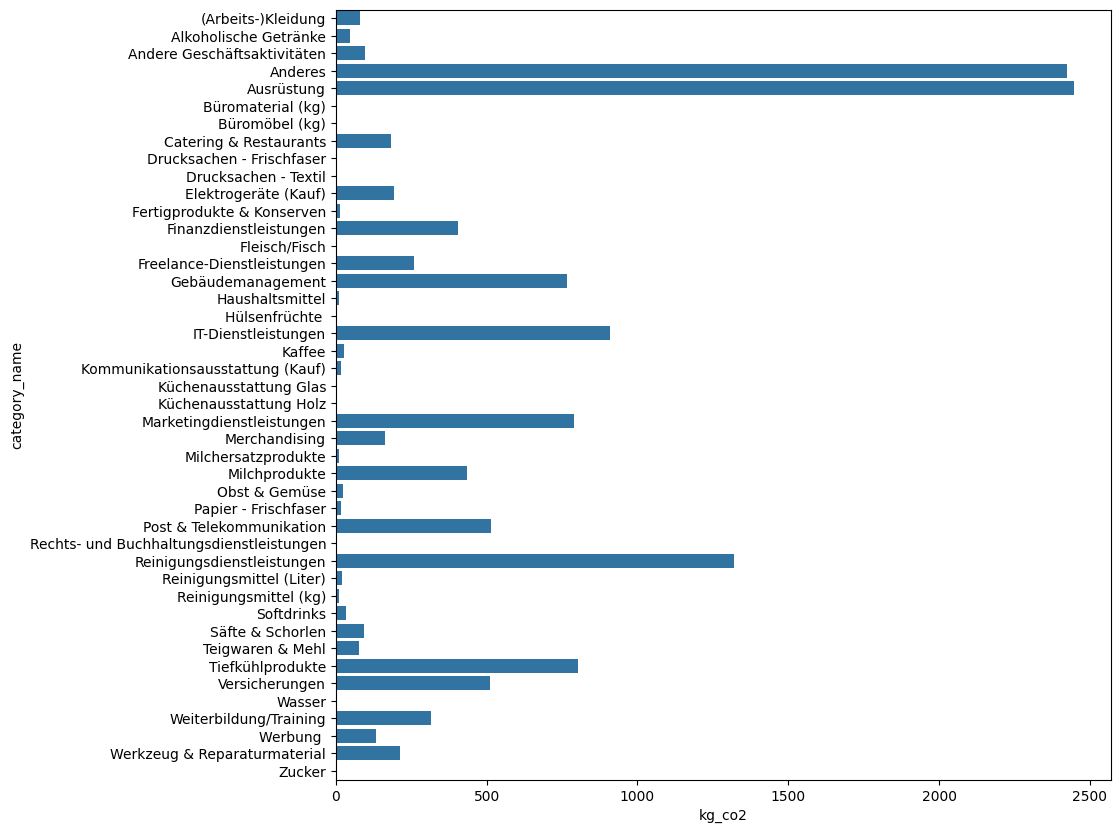

In [43]:
import seaborn as sns
g = sns.barplot(summed, x="kg_co2", y="category_name")
g.figure.set_size_inches(10, 10)